# A Study On Various Factors Contributed to Borrower's Ability to Pay Debts 

## Objective

Analyze every possible factors that may affect the ability of borrowers to repay back their loaned money. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('E:\\Kerja\\Funding Societies - Modalku\\loans_fs.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,Unnamed: 0,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72
3,3,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,4,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94


## Personal Notes

**Disclaimer** : I have to admit, i am still really new on investment. I don't know a lot of terms used on this subject. One thing that i am afraid the most is if i had a misconception on some of the terms. It will later make the whole analysis wrong. But, i will do anything that i can to make it work.    

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('E:\\Kerja\\Funding Societies - Modalku\\loans_fs.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,Unnamed: 0,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72
3,3,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,4,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94


First, i need to see how many rows that this data has.

In [4]:
print('this data has', len(data), 'rows')

this data has 887379 rows


I know that most of the analysis would be done by the machine, but at least us as the scientist need to know how this data actually looks like. So, i decided to look deeper into each column names and its data types. 

In [15]:
column_name = list(data.columns)
column_type =[]

for i in column_name:
    column_type.append(str(type(data[i].loc[0])))

column_name_type = pd.DataFrame()
column_name_type['column_name'] = column_name
column_name_type['column_type'] = column_type

In [34]:
import re

new_type = []
for n in column_name_type.column_type:
    a = re.findall("\'.*\'", n)
    a = a[0].replace('"', '')
    a = a.replace("'", "")
    new_type.append(a)

column_name_type['column_type'] = new_type

In [51]:
numb_of_class = []
for c, n in zip(column_name_type.column_name, column_name_type.column_type):
    if n == 'str':
        a = int(len(data[c].value_counts()))
    else: a = np.nan
    numb_of_class.append(a)
column_name_type['numb_of_class'] = numb_of_class

In [61]:
column_name_type['column_type'].loc[10] = 'str'
column_name_type['numb_of_class'].loc[10] = len(data['emp_title'].value_counts()) 

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
column_name_type

,column_name,column_type,numb_of_class
0,Unnamed: 0,numpy.int64,NaN
1,member_id,numpy.int64,NaN
2,loan_amnt,numpy.float64,NaN
3,funded_amnt,numpy.float64,NaN
4,funded_amnt_inv,numpy.float64,NaN
5,term,str,3.0
6,int_rate,numpy.float64,NaN
7,installment,numpy.float64,NaN
8,grade,str,7.0
9,sub_grade,str,35.0


From the data above, i see that the feature that related to the ability of borrowers to repay back the money is loan_status. I am going to analyze the data and make loan_status as my basis.

In [94]:
data.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

We need the definitions of all of those terms. 
1. Current
A loan can have the status ‘current’ when one or more payments have been completed and no payments are past due. It also means that this loan still has one or more scheduled future payments. 

2. Fully paid
A ‘fully paid’ loan has been repaid in full including all principal and interest payments.

3. Charged off
After a loan has been defaulted we take action as described above. Once our actions and those of the debt collection agencies that we work with are completed, the loan is ‘charged off’. From this status everybody knows that no further action is taken on this loan and all dunning, collection and legal measures that are possible have been completed.
A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. What does having a charge-off mean? For starters, it can mean serious repercussions on your credit and future borrowing ability.
A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible; this typically follows 180 days or six months of non-payment. In addition, debt payments that fall below the required minimum payment for the period will also be charged off if the debtor does not make up for the shortfall. The creditor crosses off the consumer’s debt as uncollectible and marks it on the consumer’s credit report as a charge-off.

4. Late (31-120 days)
When one or more payments of a loan are overdue for 30 days or more, but less than 120 days, the status is ‘late (31-120 days)′. When a loan is in this status the dunning procedures are ongoing and we regularly get in touch with the borrower by email and over the phone.

5. Issued
New loan that has passed all Investors reviews, received full funding, and has been issued.

6. In grace period
This status indicates that a loan has become due (regardless if it's the first payment or a consecutive payment on the loan). This period lasts 15 days (or some cases only three days) from the time the payment becomes due. If the borrower completes the payment during that time the payment is marked as "Paid on time" and no late interest is charged on the loan.

7. Late (16-30 days)
When one or more payments of a loan are overdue for more than 15 days, but for less than 31 days, the status is ‘late (16-30 days)′. This is the first of the two late ranges. This also means that we have started to get in touch with the borrower via multiple communication channels to remind them about their payment obligations.

8. Default
When a loan has one or more payments that are overdue for over 120 days the loan is considered as ‘default’. After a loan has reached this status we decide individually what happens next.
If the borrower communicates with us we can still agree on an alternative repayment plan. If the borrower does not reply or is not willing / able to repay we have the right to terminate the loan before the 90 day mark and send the full outstanding loan amount to a debt collection agency.
The debt collector in most cases will either try to agree on a certain repayment with the borrower directly or bring the case to court. The net recovery proceeds from passing the claim to a debt collector are distributed among the lenders of the loan.

9. Canceled
During the auction of a loan that has been listed on our marketplace, a listing can get ‘canceled’. This typically happens when borrowers are not happy with their listing or changed their mind about getting a loan. Bitbond as a platform also reserves the right to cancel loans. However, this happens only very rarely. We cancel loans only if the loan description contains content that is against our Terms of Use or we observe fraudulent behavior by the borrower.

*source :
1. https://help.bitbond.com/article/20-the-10-loan-status-variants-explained
2. help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-*

But, i could not find the definitions of **Does not meet the credit policy** for both *fully paid* and *charged off*. So, i decided to put the data with loan_status: *Does not meet the credit policy:fully paid to fully_paid* and loan_status: *Does not meet the credit policy: Charged off* to *Charged off*


A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. Lenders, including issuers of mortgages, use it as a way to measure your ability to manage the payments you make each month and repay the money you have borrowed. (source : https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp)

Actually, zip_code can be really useful. With zip_code, we can know in what area the loaner live, which means we can also know in what kind of society they live. It would indicate their lifestyle and the way they spend their money. 

But since we don't have a map, it would be hard to analyze how zip_code relate to a loaner ability to repay their loan (map can show us area's zip_code).

In [81]:
desc = [str(x) for x in data.desc]

I decided to convert the loan_status 'Does not meet the credit policy' to another type of loan_status. The changes could be to 'Fully Paid' of 'Charged Off'.

In [148]:
new_loan_status = []

for t in data.loan_status:
    if t == 'Does not meet the credit policy. Status:Fully Paid': a = 'Fully Paid'
    elif t == 'Does not meet the credit policy. Status:Charged Off': a = 'Charged Off'
    else: a = t
    new_loan_status.append(a)

In [150]:
data.loan_status = new_loan_status
data.loan_status.value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

## Exploratory Data Analysis

### Sentiment analysis on every borrower's reasons

In [113]:
def get_text(text):
    new_text = re.sub('\s*Borrower added on \d*\/\d*\/\d*\s\>\s', '', text)
    new_text = new_text.replace('<br>', '').replace('<br/>', ' ')
    return new_text

new_desc = []

for d in data.desc:
    a = get_new_desc(str(d))
    new_desc.append(a)

In [139]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

desc_pol = []
desc_sub = []

for t in new_desc:
    desc_pol.append(pol(t))
    desc_sub.append(sub(t))

In [140]:
data['polarity'] = desc_pol
data['subjectivity'] = desc_sub

Text(0.5, 1.0, 'Subjectivity')

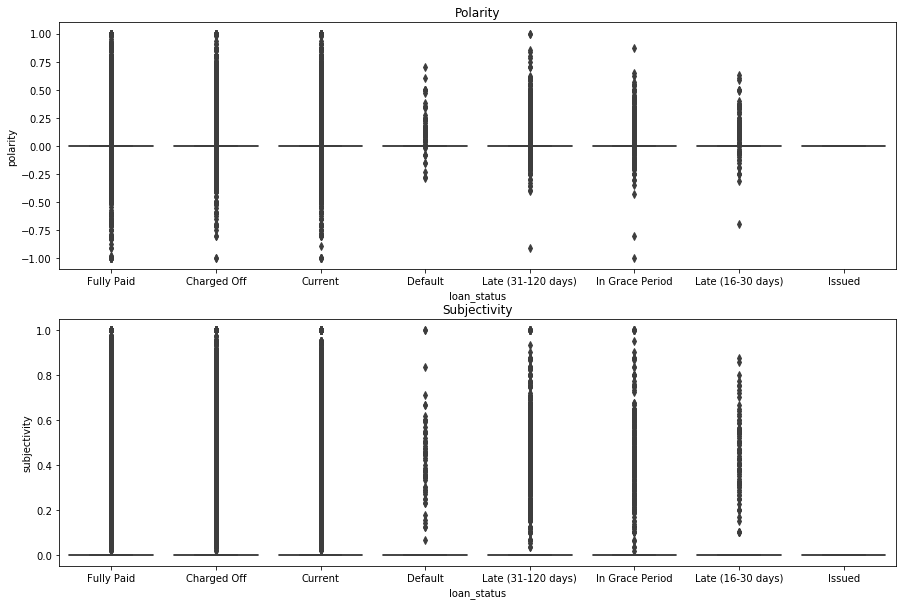

In [154]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(x='loan_status', y='polarity', data=data, ax=ax[0]).set_title('Polarity')
sns.boxplot(x='loan_status', y='subjectivity', data=data, ax=ax[1]).set_title('Subjectivity')

It can be seen that there are too many outliers. We do not even have to specify the numbers, but we already know from this graph that mean and median are zero for every **loan_status**.

We need to dig more into this data

In [158]:
desc_val = []
for i in new_desc:
    if i == '[]': desc_val.append(0)
    else: desc_val.append(1)

In [161]:
np.array(desc_val).sum()

118647

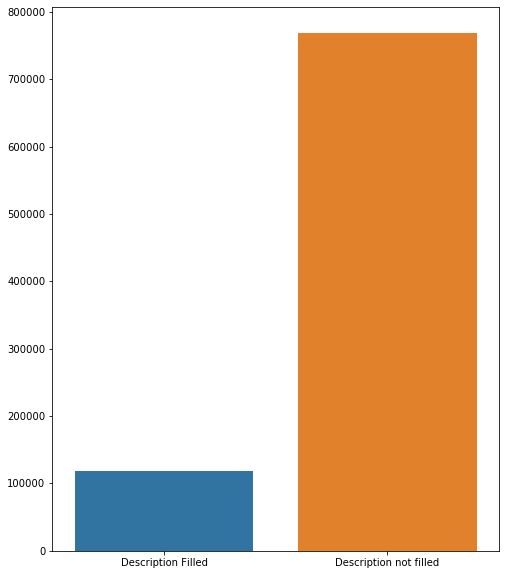

In [162]:
a = ['Description Filled', 'Description not filled']
b = [np.array(desc_val).sum(), (len(desc_val)-np.array(desc_val).sum())]

plt.figure(figsize=(8, 10))
sns.barplot(x=a, y=b)

We can see from the data above that most of the borrowers don't give any information about the reason why they borrow the money. When they didn't give us any of this information, it will make this system to give zero value on **polarity** and **subjectivity**. 

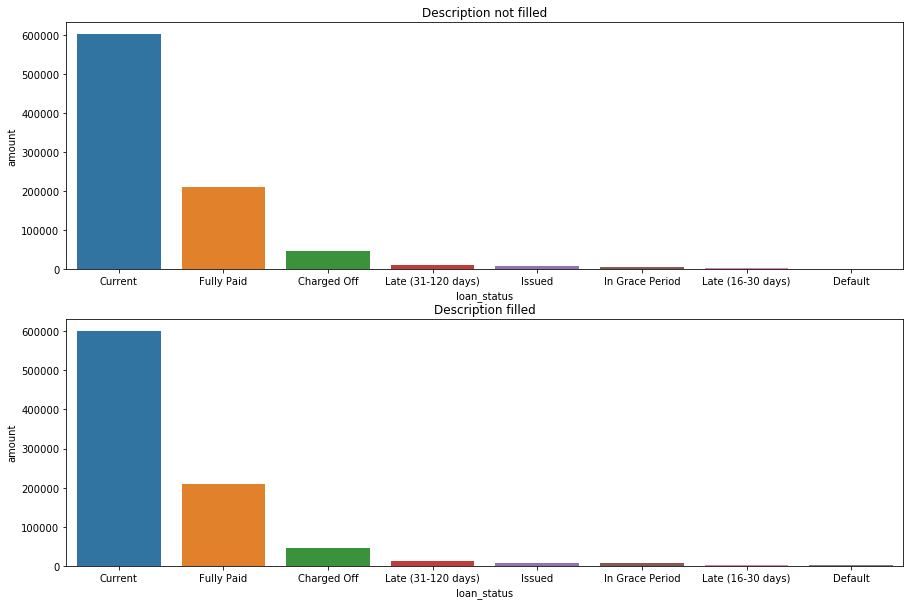

In [165]:
data['desc_info'] = desc_val

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
title = ['Description not filled', 'Description filled']
for i in range(2):
    a = data[data.desc_info == i]
    b = pd.DataFrame(data.loan_status.value_counts()).reset_index()
    b.columns = ['loan_status', 'amount']
    sns.barplot(x='loan_status', y='amount', data=b, ax=ax[i]).set_title(title[i])

We can see that basically not giving any reason doesn't really mean anything. Not giving any description on why you borrow the money doesn't mean you have a lack of ability to pay back the money. It means that for our analysis, losing big amount of data because these data have no description will not affect our results.   

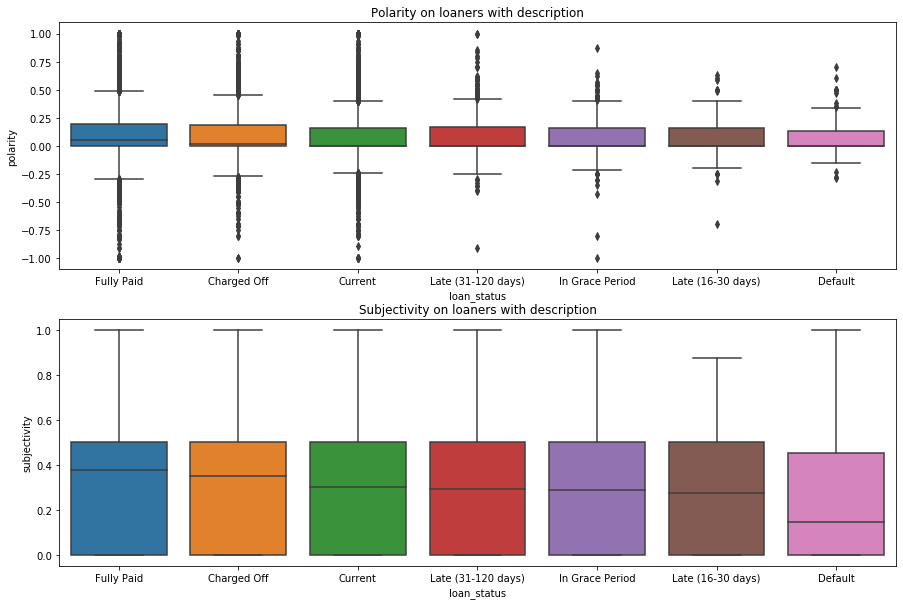

In [168]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
title = ['Polarity on loaners with description', 'Subjectivity on loaners with description']
name = ['polarity', 'subjectivity']
a = data[data.desc_info == 1]
for i in range(2):
    sns.boxplot(x='loan_status', y=name[i], data=a, ax=ax[i]).set_title(title[i])

It is surprising. The graph show that when a borrower has more subjective reason, they have a higher probability to pay back the money they borrowed. It also happen on **polarity**. The borrowers with more positive reason have higher probability to have problems paying back the money. 

In [169]:
data.loan_status.value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

### Relation of Personal information to loan status

I concluded that there are two types of loan. The first type is the loan that doesn't have a problem, and the second type is the loan that has a problem. 

The first type (having problem) has **loan_status**:
1. Charged Off 
2. Late (31-120 days)
3. In Grace Period 
4. Late (16-30 days)
5. Default

The second type (having no problem) has **loan_status**:
1. Current
2. Fully Paid

And there's still another type of **loan_status**, *Issued*, which is a **loan_status** of a loan that has been agreed, but hasn't been given to the borrowers.

In [170]:
from tqdm import tqdm

no_problems = []

y_problems = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
              'Default']
n_problems = ['Current', 'Fully Paid']

for s in tqdm(data.loan_status):
    if s in y_problems: no_problems.append(0)
    elif s in n_problems: no_problems.append(1)
    else: no_problems.append(2)

data['no_problem'] = no_problems

100%|██████████████████████████████| 887379/887379 [00:03<00:00, 271925.92it/s]


In [186]:
a = data.no_problem.value_counts()
b = a[0]*100/(a[0]+a[1])
print("{0:.2f}".format(round(b,2)), '% of the transactions have problems')

7.67 % of the transactions have problems


There's a possibility about 7.67% that the payback process would have a problem. 

We would like to find out how some personal information relate to the ability of repaying back the money. For this analysis, we will throw away most of the features but only use some of them. 

We will only use features that has personal information on them (home ownership, employment length, DTI, and annual income). Well, we still have features like employment title and address state which alsho have personal information. But, it would be too complicated to analyze these two features in the same section. If we really needed to analyze the relation between ability to repay back the loan with employment title and address state, we need different sections, and it has to be one section for each feature.   

In [193]:
a = data[(data.no_problem == 0) | (data.no_problem == 1)]
personal_columns = ['emp_length', 'home_ownership', 'annual_inc', 'dti', 'no_problem']

df_now = pd.DataFrame()
for p in personal_columns:
    df_now = pd.concat([df_now, a[p]], axis=1)

In [194]:
df_now

,emp_length,home_ownership,annual_inc,dti,no_problem
0,10+ years,RENT,24000.0,27.65,1
1,< 1 year,RENT,30000.0,1.00,0
2,10+ years,RENT,12252.0,8.72,1
3,10+ years,RENT,49200.0,20.00,1
4,1 year,RENT,80000.0,17.94,1
...,...,...,...,...,...
887374,8 years,RENT,31000.0,28.69,1
887375,10+ years,MORTGAGE,79000.0,3.90,1
887376,5 years,RENT,35000.0,30.90,1
887377,1 year,RENT,64400.0,27.19,1


In [195]:
emp = pd.DataFrame(df_now.emp_length.value_counts()).index
hom = pd.DataFrame(df_now.home_ownership.value_counts()).index

print(emp)
print(hom)

Index(['10+ years', '2 years', '< 1 year', '3 years', '1 year', '5 years',
       '4 years', '7 years', '8 years', '6 years', '9 years'],
      dtype='object')
Index(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype='object')


First, we need to transform the **emp_length** and **home_ownership** features to scalar value. For **emp_length**, the longer employment length is, the higher scalar value would be. For home ownership, if the borrowers have their own home, they would have a high scalar value, and when they don't, they would have the lower value.

In [202]:
emp = ['< 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years',
       '8 years', '9 years', '10+ years']
emp_num = np.full((len(df_now)), 100)

for i, n in tqdm(enumerate(df_now.emp_length)):
    for j, e in enumerate(emp):
        if n == e: emp_num[i] = j 

878919it [00:11, 79104.44it/s]


In [215]:
df_now['emp_num'] = emp_num
del_emp = df_now[df_now.emp_num == 100].index

In [216]:
hom_num = []

for i, n in tqdm(enumerate(df_now.home_ownership)):
    if n in ['NONE']: hom_num.append(0) 
    elif n in ['RENT']: hom_num.append(1)
    elif n in ['MORTGAGE']: hom_num.append(2)
    elif n in ['OTHER', 'OWN', 'ANY']: hom_num.append(3)
    else: hom_num.append(100)

878919it [00:03, 240759.46it/s]


In [227]:
df_now['emp_length'] = emp_num
df_now['home_ownership'] = hom_num

df_now = df_now.drop([x for x in del_emp])
df_now = df_now.drop(['emp_num'], axis=1)

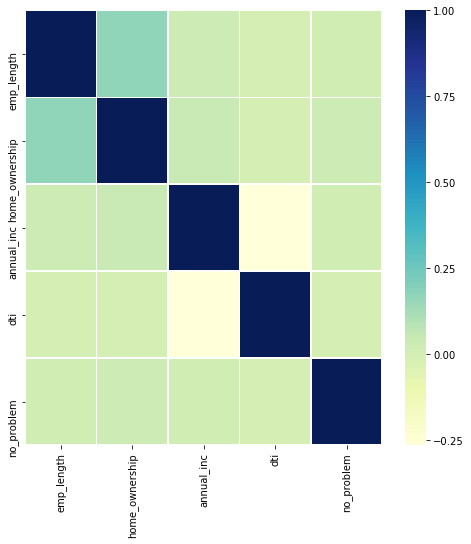

In [228]:
corr = df_now.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="YlGnBu", linewidths=0.5)

In [229]:
corr

,emp_length,home_ownership,annual_inc,dti,no_problem
emp_length,1.000000,0.171431,0.028452,-0.000789,0.016402
home_ownership,0.171431,1.000000,0.042481,0.001041,0.030586
annual_inc,0.028452,0.042481,1.000000,-0.265156,0.013925
dti,-0.000789,0.001041,-0.265156,1.000000,-0.001449
no_problem,0.016402,0.030586,0.013925,-0.001449,1.000000


From the correlation heatmap above, we can see that DTI (Debt-to-Income ratio) has negative correlation to annual income, which is pretty obvious. More income you have, less DTI you will have. Different thing happen on home ownership status. Borrowers with more stable job also tend to have stable home ownership status. They usually have their own house or having it by mortgage.

But, there is no feature that really related to the ability of the borrowers to pay debt. Home ownership is the biggest factor here. It is actually understandable, since having a house is difficult and expensive. Borrowers with their own house will pay the debt more easily than borrowers who doesn't have a house. 

Is it because borrowers have calculated first before they borrow, so they know is to possible to pay the debt or not? It means that the amount of money that was borrowed and its interest rate depended on the borrower's annual income.

In [230]:
df_now.tail()

,emp_length,home_ownership,annual_inc,dti,no_problem
887374,8,1,31000.0,28.69,1
887375,10,2,79000.0,3.90,1
887376,5,1,35000.0,30.90,1
887377,1,1,64400.0,27.19,1
887378,10,1,100000.0,10.83,1


In [233]:
df_2 = data.loan_amnt.loc[list(df_now.index)]
df_now['loan_amnt'] = df_2

In [235]:
df_now

,emp_length,home_ownership,annual_inc,dti,no_problem,loan_amnt
0,10,1,24000.0,27.65,1,5000.0
1,0,1,30000.0,1.00,0,2500.0
2,10,1,12252.0,8.72,1,2400.0
3,10,1,49200.0,20.00,1,10000.0
4,1,1,80000.0,17.94,1,3000.0
...,...,...,...,...,...,...
887374,8,1,31000.0,28.69,1,10000.0
887375,10,2,79000.0,3.90,1,24000.0
887376,5,1,35000.0,30.90,1,13000.0
887377,1,1,64400.0,27.19,1,12000.0


Text(0.5, 1.0, 'Relation between DTI and loan amount')

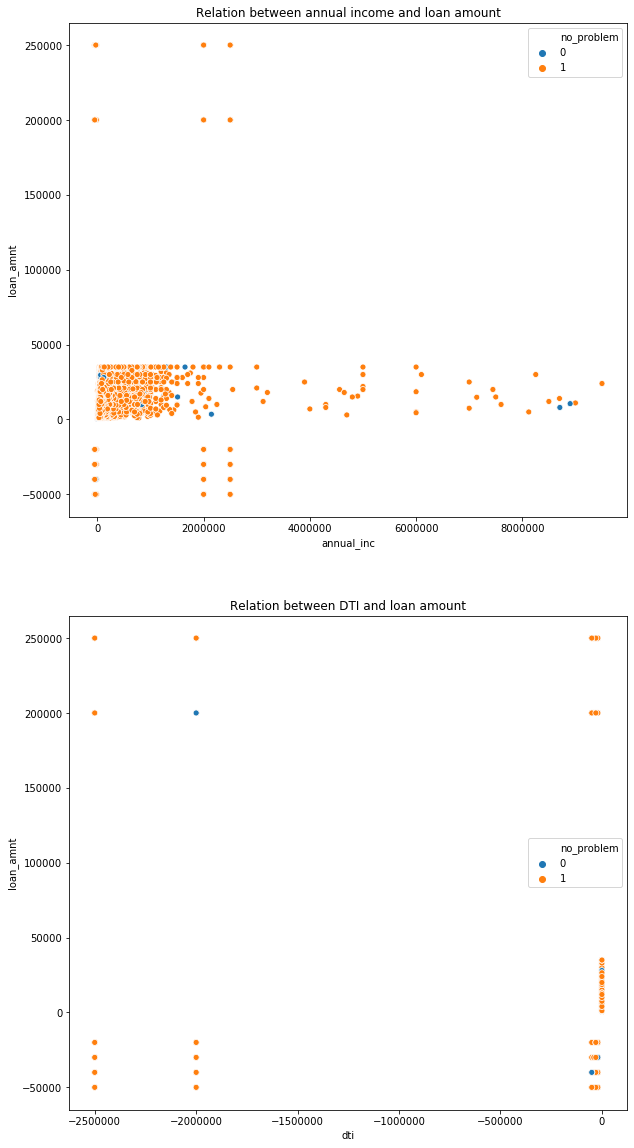

In [236]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

sns.scatterplot(x='annual_inc', y='loan_amnt', hue='no_problem',
                data=df_now, ax=ax[0]).set_title('Relation between annual income and loan amount')
sns.scatterplot(x='dti', y='loan_amnt', hue='no_problem',
                data=df_now, ax=ax[1]).set_title('Relation between DTI and loan amount') 

In [249]:
a = len(df_now[df_now.dti < 0])
b = a*100/len(data)
print('Total amount of data with negative DTI value is', "{0:.2f}".format(round(b,2)), '% (', a, 'data )')
a = len(df_now[df_now.loan_amnt < 0])
b = a*100/len(data)
print('Total amount of data with negative Loan is', "{0:.2f}".format(round(b,2)), '% (', a, 'data )')

Total amount of data with negative DTI value is 1.06 % ( 9420 data )
Total amount of data with negative Loan is 0.71 % ( 6260 data )


There are a lot of **loan_amnt** data that has negative value. It also happened with **dti** data. It has too many negative values. I tried to find out why and how could this happen, but did not find any answer. 

The simple reason why **dti** could have negative value possibly because the total debt is negative. It is obviously not because of the **annual_inc**, because from the plot above, it showed that none of **annual_inc** data has any negative values.

This made me have to make a decision. It is a speculative decision, but i decided to conclude that negative values on DTI and loan amount as anomaly. This assumption only applied for this section and other that use **loan_amnt** and **dti**.

There are only 1.06 % data with negative DTI and 0.71 % data with negative loan that we have to get rid of. We won't lost a lot of data. 

In [250]:
del_ = list(df_now[(df_now.loan_amnt < 0) | (df_now.dti < 0)].index)
df_a = df_now.drop([x for x in del_])

Text(0.5, 1.0, 'Relation between DTI and loan amount')

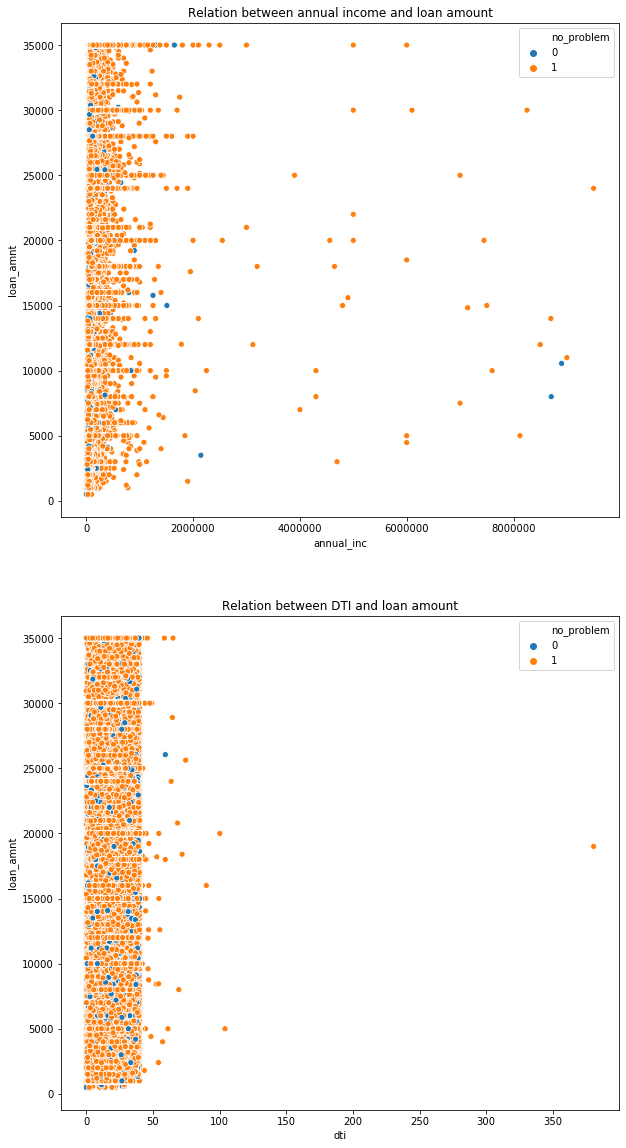

In [251]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

sns.scatterplot(x='annual_inc', y='loan_amnt', hue='no_problem',
                data=df_a, ax=ax[0]).set_title('Relation between annual income and loan amount')
sns.scatterplot(x='dti', y='loan_amnt', hue='no_problem',
                data=df_a, ax=ax[1]).set_title('Relation between DTI and loan amount') 

We can see above that there is no real correlation between loan amount and annual income or loan amount and DTI. The borrowers can borrow a lot of money while having low annual income or even reverse. Also from the scatter plot above, we can conclude that both DTI and and annual income is barely related to the ability of borrowers to repay back the money. 

### Relation of loan purpose to loan status

In [258]:
df_purpose = data.purpose.loc[df_a.index]
df_a['purpose'] = df_purpose

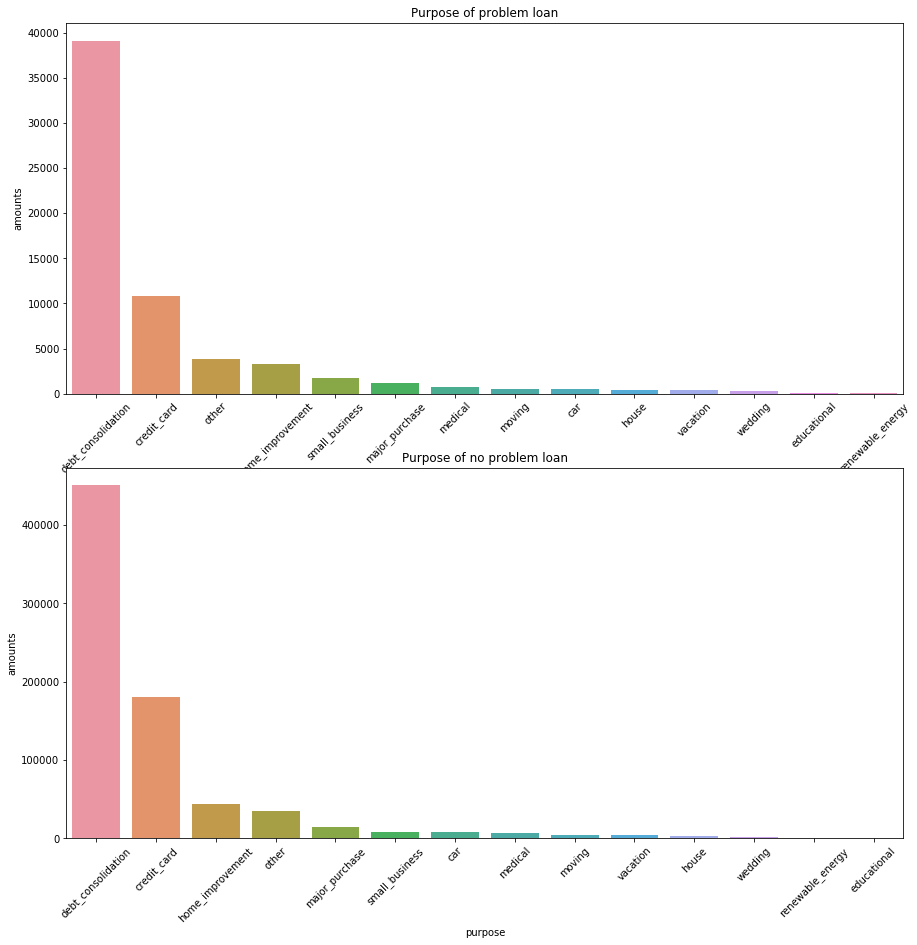

In [265]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
title = ['Purpose of problem loan', 'Purpose of no problem loan']

for i in range(2):
    a = pd.DataFrame(df_a.purpose[df_a.no_problem == i].value_counts()).reset_index()
    a.columns = ['purpose', 'amounts']
    fig = sns.barplot(x='purpose', y='amounts', data=a, ax=ax[i])
    fig.set_title(title[i])
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

From the data above, we can see the most popular to least popular purpose of the loan. The results are different between loans that have problem and loans that don't have problem. The results are:

5 Major reasons for problem loans :
1. Debt consolidation
2. Credit card
3. Other
4. Home Improvement
5. Small business

5 Major reasons for no-problem loans:
1. Debt consolidation
2. Credit card
3. Home improvement
4. Other
5. Major purchase

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'car'),
 Text(0, 0, 'house'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational'),
 Text(0, 0, 'renewable_energy')]

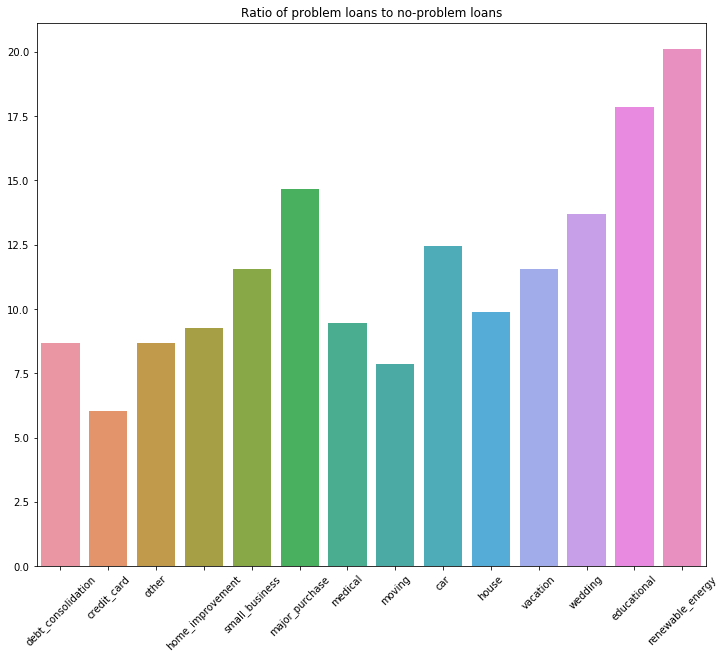

In [280]:
a = pd.DataFrame(df_a.purpose[df_a.no_problem == 0].value_counts()).reset_index()
b = pd.DataFrame(df_a.purpose[df_a.no_problem == 1].value_counts()).reset_index()
c = []
for i in a.index:
    c.append(float(a.purpose[a.index == i]*100/b.purpose[b.index == i]))

plt.figure(figsize=(12, 10))
fig = sns.barplot(x=list(a['index']), y=c)
fig.set_title('Ratio of problem loans to no-problem loans')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

From the major reasons above (Debt consolidation, Credit card, Other, Home Improvement, Small business, and Major purchase), the reason with highest probablity to have problem is major purchase, followed by small business.

But the reason with highest probability of not repaying back is renewable energy with ratio 20.12 % followed by educational with ratio 17.87 %.  

### Relation of Address state and Loan Payback Ability

Let's make an assumption. It is very possible for some areas or states to have local citizens who find it difficult to pay back the loan.  

In [282]:
df_state = data.addr_state.loc[df_a.index]
df_a['state'] = df_state 

a = pd.DataFrame(df_a.state[df_a.no_problem == 0].value_counts())
b = pd.DataFrame(df_a.state[df_a.no_problem == 1].value_counts())

In [297]:
c = []
for i in a.index:
    c.append(float(a.loc[i]*100/b.loc[i]))

df_c = pd.DataFrame()
df_c['Ratio'] = c
df_c.index = a.index
df_c.sort_values('Ratio', ascending=False).head(5)

,Ratio
IA,30.000000
ID,11.111111
HI,10.722551
NV,10.592389
AL,9.781210


Text(0.5, 1.0, 'Ratio of Problem Payback to Normal Payback')

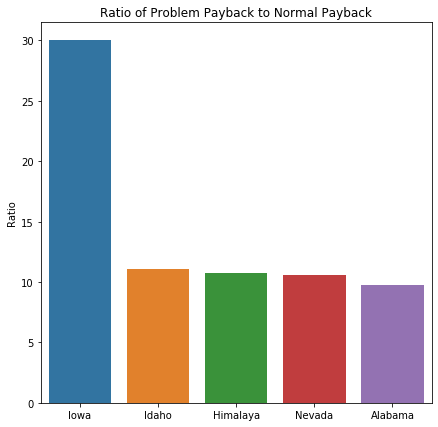

In [305]:
df_d = df_c.sort_values('Ratio', ascending=False).head(5)
df_d_states = ['Iowa', 'Idaho', 'Himalaya', 'Nevada', 'Alabama']

plt.figure(figsize=(7, 7))
sns.barplot(x=df_d_states, y=df_d.Ratio).set_title('Ratio of Problem Payback to Normal Payback')

Here we found the states with lowest ability to payback the loan. From the table above, showed five different states with the lowest ability. Number one is Iowa (IA) with the ratio 30 %. it means that from this data, it is very possible that from 10 borrowers who lived in Iowa state, three of them would be having problem paying back the money they borrowed. 

After that we have Idaho (ID) with a drastically decreased ratio compared to Iowa, 11.11 %. Followed by Himalaya, Nevada and Alabama. 

### Relation of Interest Rate to Loan Payback Ability

In [299]:
df_a['int_rate'] = data.int_rate.loc[list(df_a.index)]

Text(0.5, 1.0, 'Interest rate relation to ability to payback the money')

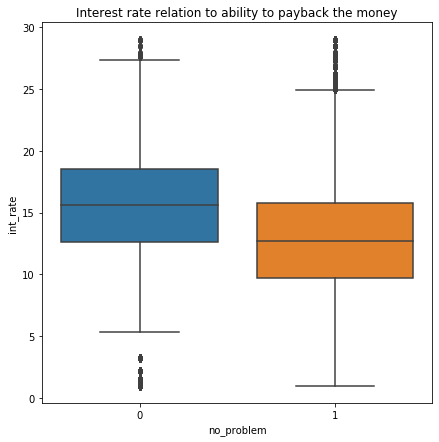

In [301]:
fig = plt.figure(figsize=(7, 7))
fig = sns.boxplot(x='no_problem', y='int_rate', data=df_a)
fig.set_title('Interest rate relation to ability to payback the money')

The graph above showed that median, quartile, and mean of no ability is always higher than those being able data. From this, we can conclude that inerest rate will increase the probability of borrowers to not being able to pay back the money they lend. 

## Conclusions

From all analysis above, we can make some conclusions. 
1. With sentiment analysis, surprisingly borrower with more subjective and negative reason has better ability to pay their debts. 
2. Borrower who has their own house also has better ability. There is no correlation of the amount of loan with borrower's annual income or DTI.
3. "Renewable energy" and "Educational" are two major reasons with the highest probability of borrowers can not paying debts.
4. Iowa is the state with lowest loan payback ability by ratio 30 %. 
5. High interest rate can trigger low loan payback ability.    

*I am very open to any suggestion. It can be on the method i analyzed the data, or even the way i understand important terms used.*